# Machine learning con scikit-learn

**Nivel Básico**


---



Víctor Muñiz Sánchez

DSK 2023


---



## Introducción

### ¿Qué es scikit-learn?
![link text](https://raw.githubusercontent.com/scikit-learn/scikit-learn/main/doc/logos/scikit-learn-logo.png)

Del sitio oficial https://scikit-learn.org:

"*Scikit-learn is a Python module for machine learning built on top of SciPy and is distributed under the 3-Clause BSD license.*

*The project was started in 2007 by David Cournapeau as a Google Summer of Code project, and since then many volunteers have contributed. See the About us page for a list of core contributors.*

*It is currently maintained by a team of volunteers."*


- Scikit-learn se utiliza principalmente para modelar datos y no tanto para manipular o resumir datos. Ofrece a sus usuarios una API uniforme y fácil de usar para aplicar diferentes modelos, con poco esfuerzo de aprendizaje.
- Implementa modelos que abarcan ML supervisado y no supervisado. Ver [machine learning map](https://scikit-learn.org/stable/tutorial/machine_learning_map/).



### Ventajas

- Facilidad de uso: Scikit-learn se caracteriza por una API limpia, con una curva de aprendizaje pequeña en comparación con otras bibliotecas como TensorFlow o Pytorch. La API es popular por su uniformidad y enfoque sencillo.
- Uniformidad: Su API uniforme hace que sea muy fácil cambiar de un modelo a otro, ya que la sintaxis básica requerida para un modelo es la misma para otros.
- Documentación/Tutoriales: La biblioteca está completamente respaldada por documentación, a la que se puede acceder sin esfuerzo y es fácil de entender. Además, también ofrece tutoriales paso a paso que cubren todos los temas necesarios para desarrollar cualquier proyecto de aprendizaje automático.
- Cobertura: al revisar la lista de componentes que tiene la biblioteca, puedes ver que cubre la mayoría de las tareas de aprendizaje automático, desde modelos supervisados (clasificación y regresión) hasta modelos no supervisados como (clústering, reducción de dimensionalidad). Además, debido a sus numerosos colaboradores, se agregan nuevos modelos en períodos de tiempo relativamente cortos.

### Desventajas

- Poco flexible: Debido a su facilidad de uso, la biblioteca tiende a ser poco flexible. Esto significa que los usuarios no tienen mucha libertad en la incorporación de parámetros o la arquitectura del modelo. Esto se convierte en un problema a medida que los principiantes pasan a proyectos más complejos.
- Ineficiente para deep learning: como se mencionó anteriormente, el rendimiento de la biblioteca se queda corto cuando se abordan proyectos complejos de aprendizaje automático. Esto es especialmente cierto para el aprendizaje profundo, ya que scikit-learn no admite redes neuronales profundas con la arquitectura o la potencia computacional necesarias.


### El ecosistema de python para machine learning

[Jupyter Meets the Earth](https://jupytearth.org/index.html)

![figure](https://drive.google.com/uc?id=1mtcEKfbM7cZtxbGOlIeLEnJ_n4k4Ubfh)




### Sklearn API (application programming interface)

Sklearn cuenta con una extensa documentación de su API:
- [API reference](https://scikit-learn.org/stable/modules/classes.html#)

- [User guide](https://scikit-learn.org/stable/user_guide.html)


#### ¿Cómo es su diseño?
Veremos detalles importantes de su arquitectura.

Fuente: Lars Buitinck et al., [API design for machine learning software: experiences from the scikit-learn project. 2013](https://arxiv.org/abs/1309.0238).


El objetivo de la API scikit-learn es proporcionar una sintaxis eficiente y unificada para hacer que el aprendizaje automático sea accesible para no expertos, así como facilitar y popularizar su uso entre varias industrias.

La API está diseñada siguiendo los siguientes principios:

- Consistencia. Todos los objetos (básicos o compuestos) comparten una interfaz consistente compuesta por un conjunto limitado de métodos. Esta interfaz está documentada de manera consistente para todos los objetos.
- Inspección. Los parámetros del constructor y los valores de los parámetros determinados por algoritmos de aprendizaje se almacenan y exponen como atributos públicos.
- No proliferación de clases. Los algoritmos de aprendizaje son los únicos objetos que se representan mediante clases personalizadas. Los conjuntos de datos se representan como matrices NumPy o matrices dispersas SciPy. Los nombres y valores de los hiperparámetros se representan como cadenas o números estándar de Python siempre que sea posible. Esto hace que scikitlearn sea fácil de usar y fácil de combinar con otras bibliotecas.
- Composición. Muchas tareas de aprendizaje automático se pueden expresar como secuencias o combinaciones de transformaciones de datos. Algunos algoritmos de aprendizaje también se consideran naturalmente meta-algoritmos parametrizados en otros algoritmos. Siempre que sea factible, dichos algoritmos se implementan y componen a partir de bloques de construcción existentes.
- Valores predeterminados adecuados. Siempre que una operación requiere un parámetro definido por el usuario, la biblioteca define un valor predeterminado apropiado. El valor predeterminado debería hacer que la operación se realice de forma sensata (proporcionando una solución básica para la tarea en cuestión).




Una estructura muy común de una clase que implementa algún modelo es ésta:

```
  class SupervisedModel(...):    
    def __init__(self, param1, param2, ...):
      self.p1 = param1
      self.p2 = param2
    
    def fit(self, x, y):
      ...
      return self
        
    def predict(self, x):
      ...
      return yhat
        
    """ Etc..... """   
```

En scikit-learn, se realiza mediante la API, que como se mencionó antes, es uniforme y compartida para todos los objetos de la librería.

La API consiste en tres interfaces complementarias:

- Estimator: Este se considera el núcleo de toda la API, ya que es la interfaz encargada de ajustar los modelos a los datos de entrada. Funciona inicializando el modelo que se utilizará y luego aplicando un método `fit()` que desencadena el proceso de aprendizaje para construir un modelo basado en los datos.

  El método fit() recibe como argumentos los datos de entrenamiento `X_train`, y `y_train` si es un problema de ML supervisado.

  Este método crea el modelo entrenado con los datos de entrada, que luego se pueden usar para predecir.

  Algunos modelos toman otros argumentos además de los datos de entrenamiento, que también se denominan hiperparámetros. Estos hiperparámetros se establecen inicialmente en sus valores predeterminados, pero se pueden ajustar para mejorar el rendimiento del modelo.

  ```
  from sklearn.linear model import LogisticRegression

  clf = LogisticRegression(penalty=”l1”)
  clf.fit(X train, y train)
  ```
  Otros objetos que se implementan con ésta interfase son rutinas de preprocesamiento (p. ej., estandarización de variables), técnicas de reducción de dimensión o técnicas de extracción de características (p. ej., vectorización de documentos de texto).

- Predictor: el predictor toma el modelo creado por el estimador y lo extiende para realizar predicciones sobre datos nuevos `X_test` en función de los parámetros aprendidos durante el entrenamiento del modelo.

  ```
  y pred= clf .predict(X test)
  ```

  Algunos modelos no supervisados también pueden beneficiarse del predictor. Si bien este método no genera un valor objetivo específico, puede resultar útil para asignar una nueva instancia a un clúster, por ejemplo.

  ```
  from sklearn.cluster import KMeans
  km = KMeans(n clusters=10)
  km.fit(X_train)
  clust_pred = km.predict(X_test)
  ```

- Transformer: Muchas veces los datos se modifican o transforman antes de alimentar un modelo. La API contiene un método `transform()` que permite realizar algunas técnicas de preprocesamiento.

  Se puede utilizar para datos de entrada del modelo, y para datos que se introducirán en el modelo para realizar predicciones. Esta última aplicación es crucial para obtener resultados precisos, ya que garantiza que los nuevos datos sigan la misma distribución que los datos utilizados para entrenar el modelo.

  ```
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)

  X_test = scaler.transform(X_test)
  ```





### Meta-estimadores

Varios métodos de ML consisten en el uso y combinación de otros métodos de aprendizaje (e.g. random forests, boosting) o ciertos clasificadores multiclase. En sklearn, éstos modelos se implementan como *meta-estimators*, que toman como entrada un estimador base.

```
from sklearn.multiclass import OneVsOneClassifier
ovo_lr = OneVsOneClassifier(LogisticRegression(penalty=” l1”))
```


### Pipelines

Una característica interesante de sklearn es la definición de nuevos estimadores mediante la *composición* de varios estimadores base. Hay dos mecanismos: objetos `Pipeline`y `FeatureUnion`

- Pipelines: composición de *transformers* y *predictors*

![figure](https://miro.medium.com/v2/resize:fit:720/format:webp/1*e6U6j_FJirAbYYYTfEB-wQ.png)

[Fuente](https://medium.com/ai-made-simple/pipelines-in-scikit-learn-46c61c5c60b2)

```
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
estimators = [('reduce_dim', PCA()), ('clf', SVC())]
pipe = Pipeline(estimators)
#pipe
#Pipeline(steps=[('reduce_dim', PCA()), ('clf', SVC())])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
```

- FeatureUnion: Concatena resultados de múltiples objetos transformadores.

Este estimador aplica una lista de objetos *tranformer* en paralelo a los datos de entrada y luego concatena los resultados. Esto es útil para combinar varios mecanismos de extracción de características en un solo *transformer*.

![figure](https://miro.medium.com/max/836/1*rcxISJ9JiW1EUoqjEl3n-g.png)

[Fuente](https://sefidian.com/2022/08/30/a-tutorial-on-scikit-learn-pipeline-columntransformer-and-featureunion/)

![figure](https://miro.medium.com/max/1075/1*CCZdpkE_Zt_nY4UNN-_OJQ.png)

[Fuente](https://sefidian.com/2022/08/30/a-tutorial-on-scikit-learn-pipeline-columntransformer-and-featureunion/)


```
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.decomposition import PCA, KernelPCA
from sklearn.feature selection import SelectKBest

union = FeatureUnion([(”pca”, PCA()),
                      (”kpca”, KernelPCA(kernel=”rbf”))])

Pipeline([(”feat union”, union),
          (”feat sel”, SelectKBest(k=10)),
          (”log reg”, LogisticRegression(penalty=”l2”))
          ]).fit(X_train, y_train).predict(X test)
```


## Ejemplo: Datos de OTUs (operational taxonomic unit).

Tomados del [Metagenomic Geolocation Challenge CAMDA 2020](http://camda2020.bioinf.jku.at/doku.php/contest_dataset#metagenomic_geolocation_challenge).

In [2]:
from google.colab import drive
import os
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [3]:
!pwd

/content


In [4]:
os.chdir('/content/drive/My Drive/Cursos/metagenomica/Notebooks/')
!pwd

/content/drive/My Drive/Cursos/metagenomica/Notebooks


In [5]:
!pip install contextily

In [6]:
import contextily as ctx
import matplotlib.pyplot as plt
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd
import numpy as np
import seaborn as sns

otus = pd.read_csv("../data/OTUS_conservados.csv", index_col="X")
otus

,New_Labels,Latitude,Longitude,X4457032,X4471583,X9560,X4468101,X198079,X101868,X4360511,...,X210657,X218246,X48487,X81081,X1787355,X6159,X154268,X855996,X99400,X716037
X,,,,,,,,,,,,,,,,,,,,,
1001.skm3,WarmT-SumDry-HotSum0,33.194000,-117.241000,0.003306,0.000000,0.0,0.000000,0.0,0.005785,0.000000,...,0.0,0.00000,0.004752,0.007231,0.000000,0.000000,0.0,0.002273,0.000000,0.00000
1001.skd3,WarmT-SumDry-HotSum0,33.194000,-117.241000,0.002699,0.000000,0.0,0.000000,0.0,0.001080,0.000180,...,0.0,0.00000,0.003419,0.029872,0.000180,0.000000,0.0,0.000720,0.000000,0.00000
1001.skm1,WarmT-SumDry-HotSum0,33.194000,-117.241000,0.001304,0.000000,0.0,0.000000,0.0,0.002934,0.000000,...,0.0,0.00000,0.004563,0.004563,0.000326,0.000000,0.0,0.001304,0.000000,0.00000
1001.skb3,WarmT-SumDry-HotSum0,33.194000,-117.241000,0.009130,0.000000,0.0,0.000000,0.0,0.004966,0.000000,...,0.0,0.00016,0.004645,0.008169,0.000961,0.000000,0.0,0.002243,0.000160,0.00032
1001.skm2,WarmT-SumDry-HotSum0,33.194000,-117.241000,0.001022,0.000000,0.0,0.000000,0.0,0.000341,0.000000,...,0.0,0.00000,0.005112,0.010907,0.000682,0.000000,0.0,0.002045,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883.2011.282.crump.artic.ltreb.main.lane4.noindex,Snow-FullH-CoolSum8,68.585839,-149.622223,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000028,...,0.0,0.00000,0.000000,0.000000,0.000000,0.006404,0.0,0.000000,0.001601,0.00000
1883.2011.329.crump.artic.ltreb.main.lane4.noindex,Snow-FullH-CoolSum8,68.608533,-149.587633,0.000110,0.000000,0.0,0.000028,0.0,0.000000,0.000000,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000248,0.00000
1883.2011.348.crump.artic.ltreb.main.lane4.noindex,Snow-FullH-CoolSum8,68.596883,-149.601250,0.000528,0.000024,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000024,0.0,0.000000,0.000744,0.00000


In [7]:
otus.shape

(3043, 606)

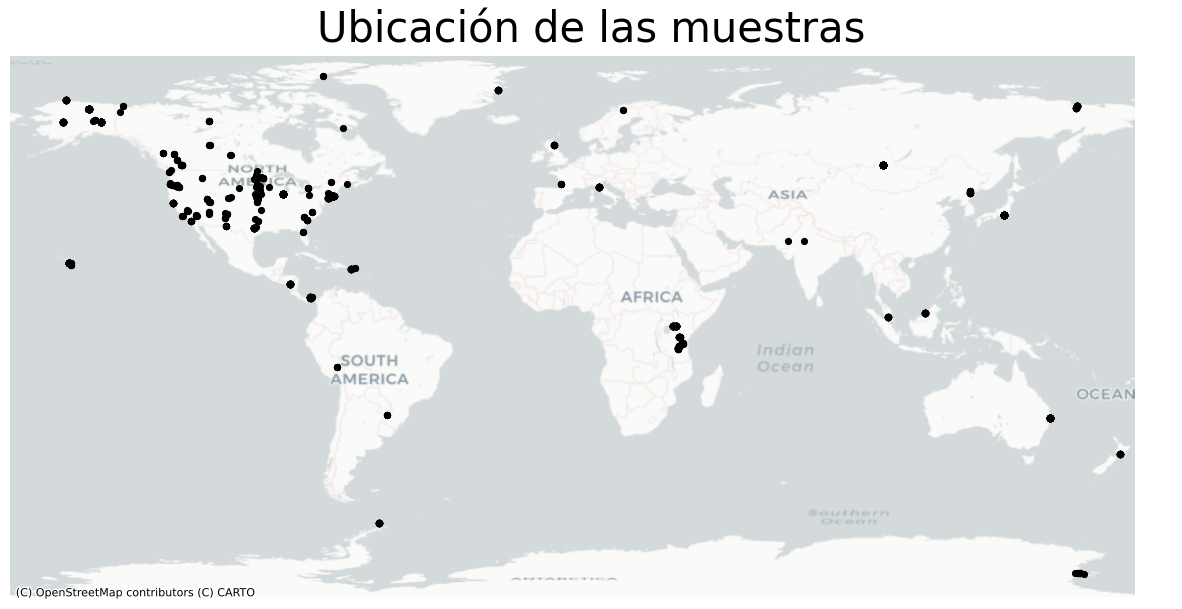

In [8]:
otus_gdf = gpd.GeoDataFrame(otus.copy(), geometry=gpd.points_from_xy(otus['Longitude'], otus['Latitude']), crs='EPSG:4326')

fig, ax = plt.subplots(1, figsize=(15, 15))
otus_gdf.plot(marker='.', c='black', ax=ax, markersize=70, zorder=1)
plt.title("Ubicación de las muestras",fontsize=30)
plt.axis("off")

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs='EPSG:4326')

In [9]:
cont_names = list(otus.drop(["New_Labels","Latitude", "Longitude"], axis=1).columns)
y_names = ["New_Labels"]
train_df = otus[cont_names+y_names]
train_df

,X4457032,X4471583,X9560,X4468101,X198079,X101868,X4360511,X9961,X3944484,X1105039,...,X218246,X48487,X81081,X1787355,X6159,X154268,X855996,X99400,X716037,New_Labels
X,,,,,,,,,,,,,,,,,,,,,
1001.skm3,0.003306,0.000000,0.0,0.000000,0.0,0.005785,0.000000,0.0,0.000000,0.000000,...,0.00000,0.004752,0.007231,0.000000,0.000000,0.0,0.002273,0.000000,0.00000,WarmT-SumDry-HotSum0
1001.skd3,0.002699,0.000000,0.0,0.000000,0.0,0.001080,0.000180,0.0,0.000000,0.000000,...,0.00000,0.003419,0.029872,0.000180,0.000000,0.0,0.000720,0.000000,0.00000,WarmT-SumDry-HotSum0
1001.skm1,0.001304,0.000000,0.0,0.000000,0.0,0.002934,0.000000,0.0,0.000000,0.000000,...,0.00000,0.004563,0.004563,0.000326,0.000000,0.0,0.001304,0.000000,0.00000,WarmT-SumDry-HotSum0
1001.skb3,0.009130,0.000000,0.0,0.000000,0.0,0.004966,0.000000,0.0,0.000000,0.000000,...,0.00016,0.004645,0.008169,0.000961,0.000000,0.0,0.002243,0.000160,0.00032,WarmT-SumDry-HotSum0
1001.skm2,0.001022,0.000000,0.0,0.000000,0.0,0.000341,0.000000,0.0,0.000000,0.000000,...,0.00000,0.005112,0.010907,0.000682,0.000000,0.0,0.002045,0.000000,0.00000,WarmT-SumDry-HotSum0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883.2011.282.crump.artic.ltreb.main.lane4.noindex,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000028,0.0,0.000028,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.006404,0.0,0.000000,0.001601,0.00000,Snow-FullH-CoolSum8
1883.2011.329.crump.artic.ltreb.main.lane4.noindex,0.000110,0.000000,0.0,0.000028,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000248,0.00000,Snow-FullH-CoolSum8
1883.2011.348.crump.artic.ltreb.main.lane4.noindex,0.000528,0.000024,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000312,...,0.00000,0.000000,0.000000,0.000000,0.000024,0.0,0.000000,0.000744,0.00000,Snow-FullH-CoolSum8


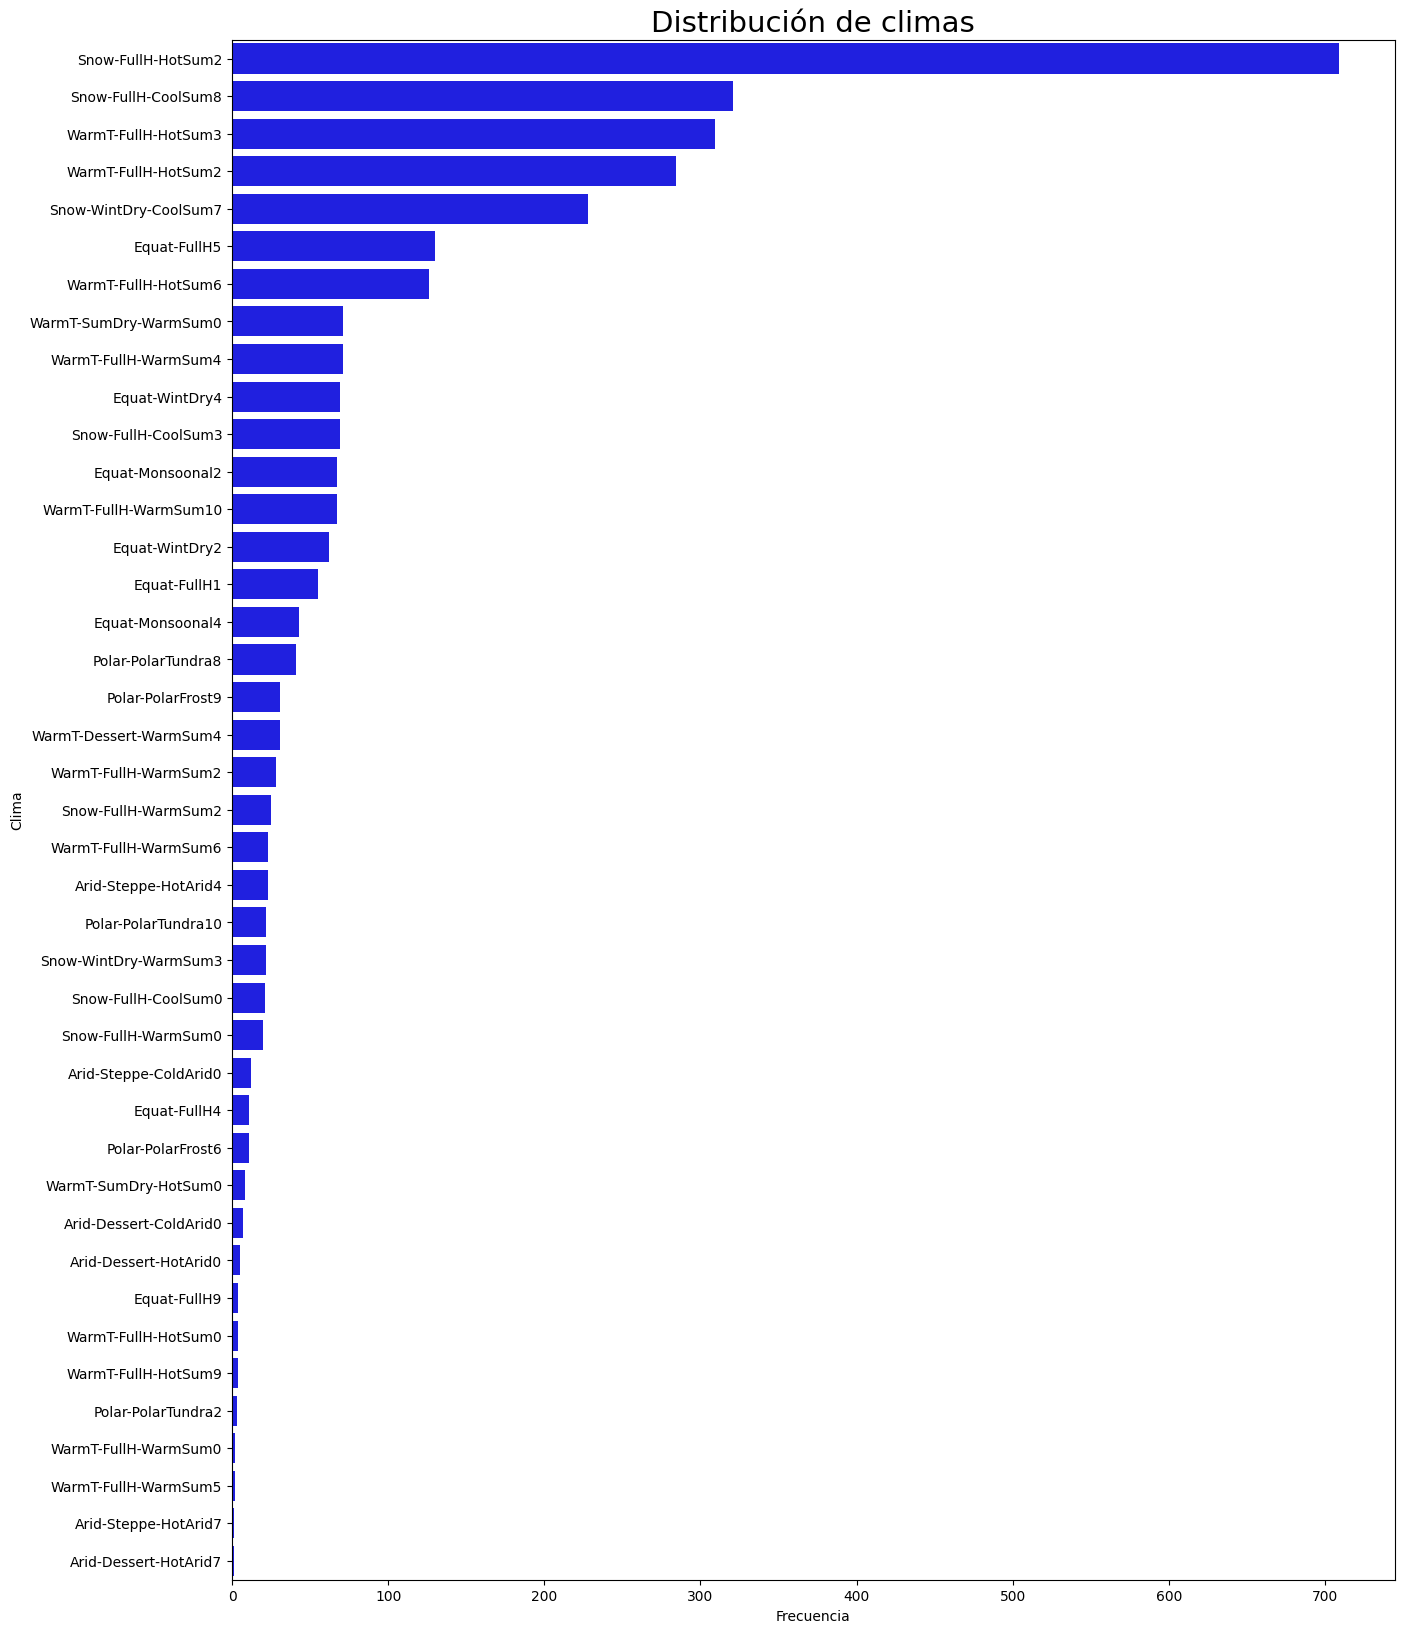

In [10]:
fig, ax = plt.subplots(1,1 ,figsize=(15, 20))
sns.countplot(data=train_df, y="New_Labels", order=train_df.New_Labels.value_counts().index, color="blue")
plt.xlabel("Frecuencia")
plt.ylabel("Clima")
plt.title("Distribución de climas", fontsize=21)
plt.show()

Veamos otras representaciones de los datos, particularmente, reduciendo su dimensión de manera lineal y no lineal

In [11]:
y = np.array(train_df[y_names]).ravel()
X = np.array(train_df.drop(y_names,axis=1)).astype('float')

### Reducción de dimensión

Representación con PCA

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px

X_std = StandardScaler().fit_transform(X)
ncomp=3
otus_pca=PCA(ncomp)
otus_pca.fit_transform(X_std)

proj = pd.DataFrame(otus_pca.transform(X_std),columns = ['pc1','pc2','pc3'])
pca_proj = pd.DataFrame({'pc1': proj['pc1'], 'pc2': proj['pc2'], 'clima': y})

# Grafica interactiva
fig = px.scatter(pca_proj, x='pc1', y='pc2', hover_data=['clima'], color = 'clima')
fig.update_layout(
    autosize=False,
    width=800,
    height=800,
)
fig.show()

[Manifold learning](https://scikit-learn.org/stable/modules/manifold.html): reducción de dimensión no lineal.



In [16]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=500)
#X_tsne = tsne.fit_transform(train_img)
#tsne_dataset = pd.DataFrame({'pc1': X_tsne[:, 0], 'pc2': X_tsne[:, 1], 'digit': y_train})
X_tsne = tsne.fit_transform(X_std)

tsne_dataset = pd.DataFrame({'pc1': X_tsne[:, 0], 'pc2': X_tsne[:, 1], 'clima': y})

In [17]:
# Grafica interactiva
fig = px.scatter(tsne_dataset, x='pc1', y='pc2', hover_data=['clima'], color = 'clima')
fig.update_layout(
    autosize=False,
    width=800,
    height=800,
)
fig.show()


### Clustering

Ver la [documentación](https://scikit-learn.org/stable/modules/clustering.html).

#### Clustering jerárquico aglomerativo

En clustering jerárquico aglomerativo, los *objetos* se “aglomeran” para formar clústers de 3 formas principalmente:
- Single linkage o vecino más cercano
- Complete linkage o vecino más lejano
- Average linkage

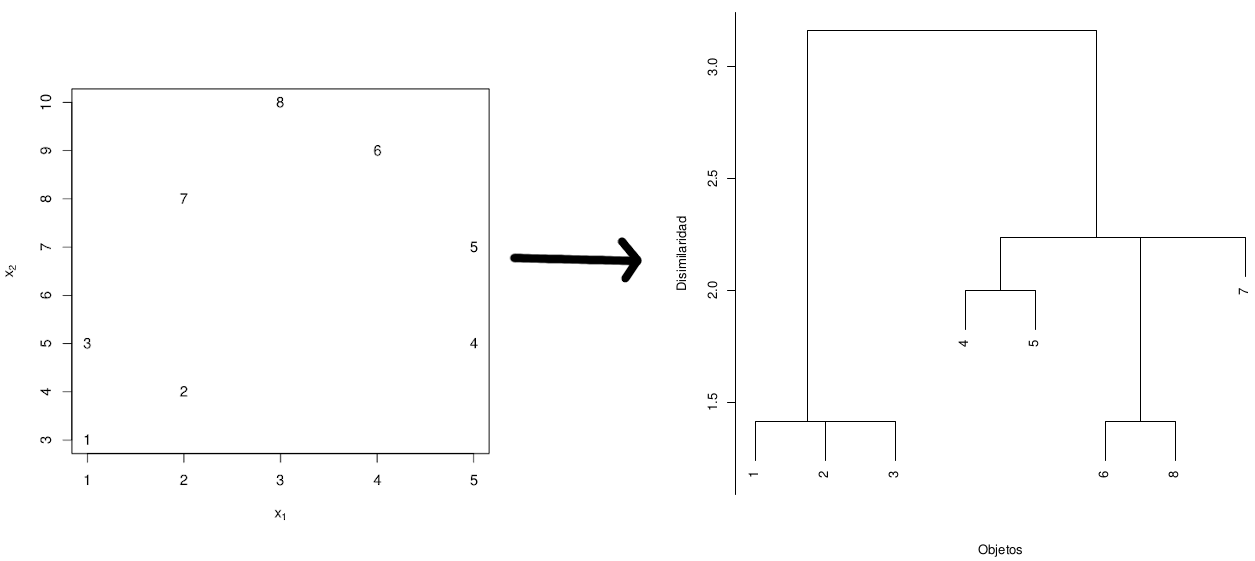

In [48]:
import IPython.display as ipd
ipd.Image("../Notebooks_2024/figs/clust_jerarquico.png", width=800)

In [13]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='average')
cluster.fit_predict(proj)

print('Clusters: ',cluster.n_clusters_)

Clusters:  3043


In [14]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

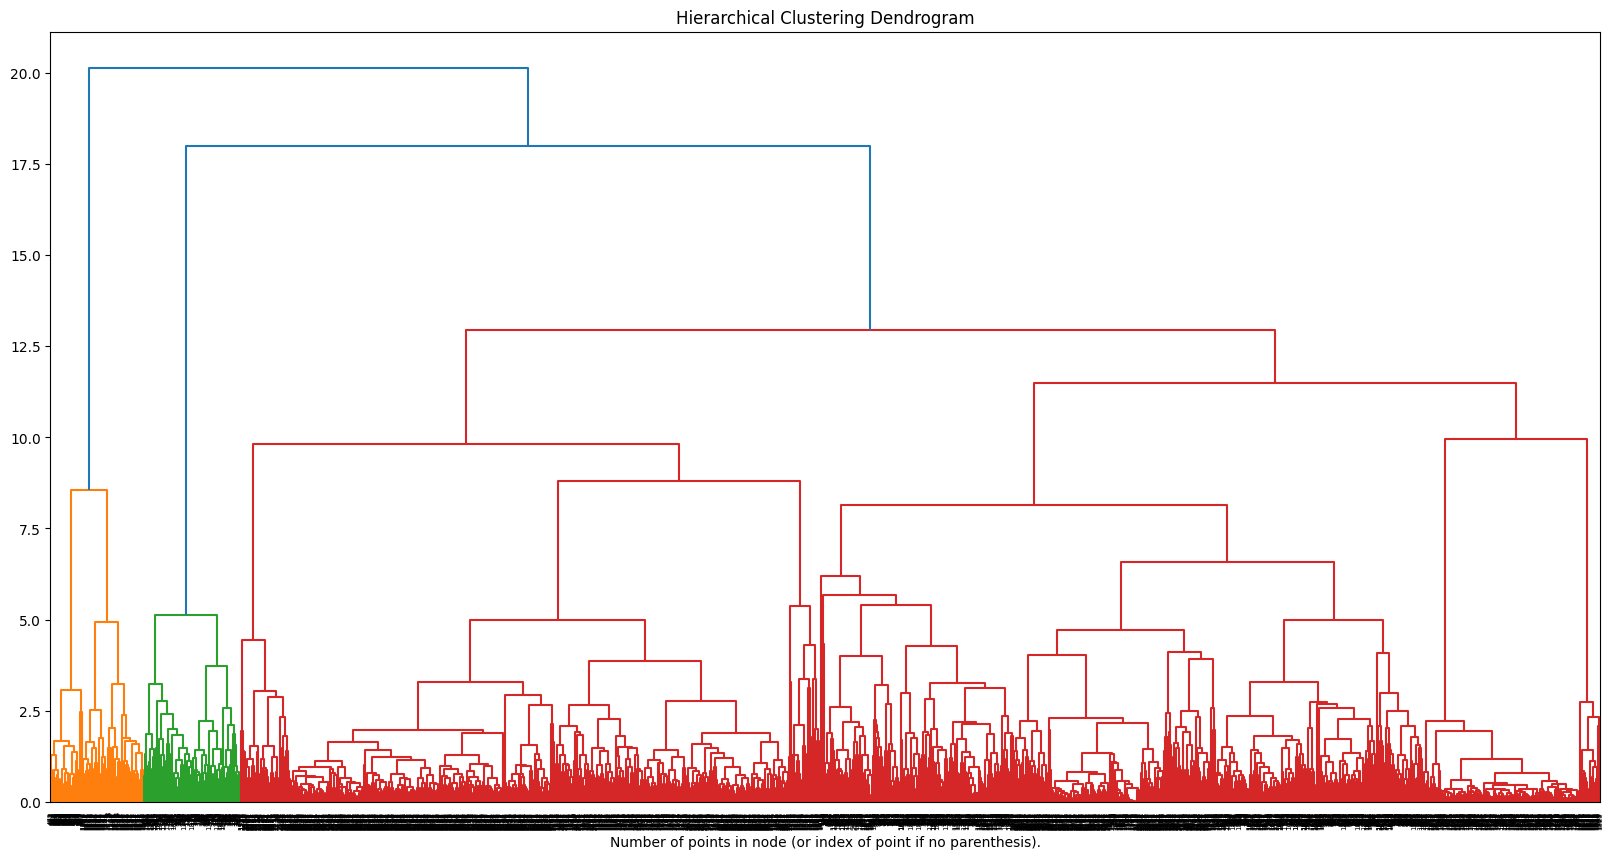

In [15]:
plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(cluster) #, truncate_mode='level', p=8)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

#### $k-$ means

Es un algoritmo combinatorio que asigna $n$ objetos en $k$ clústers, de acuerdo al criterio de distancia mínima entre cada objeto y los *prototipos* de cada clúster. Generalmente, se usa el centroide como prototipo de los clústers.

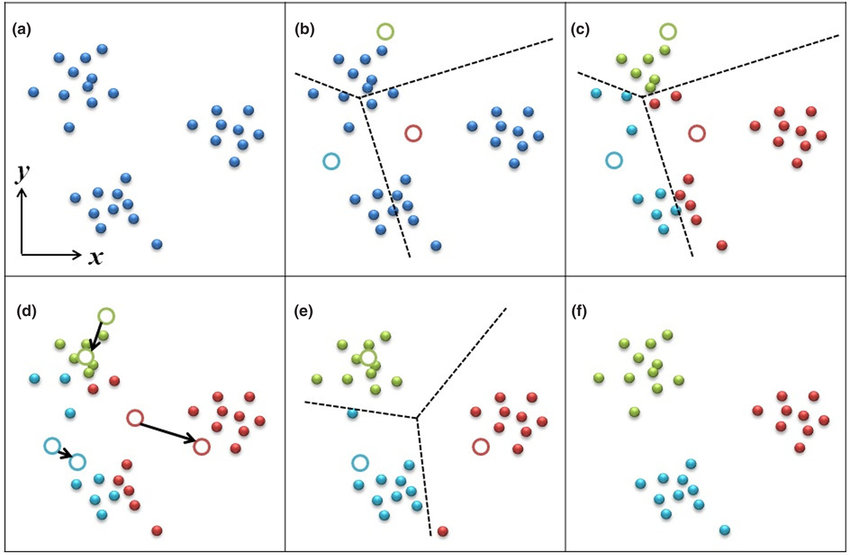

In [52]:
ipd.Image("../Notebooks_2024/figs/k-means.png", width=600)

In [16]:
from sklearn import cluster

# K-MEANS en los componentes principales de la matriz de similaridad
k = 20
k_means = cluster.MiniBatchKMeans(n_clusters=k, random_state=10)
k_means.fit(proj)
#cl_pred = pd.DataFrame(k_means.predict(proj)).astype('category')
cl_pred = pd.Series(k_means.predict(proj), dtype="category")
#cl_pred = k_means.predict(proj)
cl_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



0       4
1       4
2       4
3       4
4       4
       ..
3038    0
3039    0
3040    0
3041    9
3042    0
Length: 3043, dtype: category
Categories (20, int64): [0, 1, 2, 3, ..., 16, 17, 18, 19]

In [17]:
pca_clust = pd.DataFrame({'pc1': proj['pc1'], 'pc2': proj['pc2'], 'clima': y, 'clus': cl_pred})

fig = px.scatter(pca_clust, x='pc1', y='pc2', hover_data=['clima'], color = 'clus')
fig.update_layout(
    autosize=False,
    width=600,
    height=600,
)
fig.show()

### Clasificación

Ver la [documentación](https://scikit-learn.org/stable/supervised_learning.html)

Para fines didácticos, restrinjo los datos a aquellos que tienen al menos `n_min` datos en su categoría:

In [18]:
def get_reduced_data(data,y_counts,ylab='New_Labels',n_min=20):
    y_val = y_counts[y_counts>n_min]
    data_val_df = data.loc[data[ylab].isin(y_val.index)]
    return data_val_df, y_val

In [19]:
cont_names = list(otus.drop(["New_Labels","Latitude", "Longitude"], axis=1).columns)
y_names = ["New_Labels"]
otus_df = otus[cont_names+y_names]
y_counts = otus_df.New_Labels.value_counts()
y_counts

Snow-FullH-HotSum2        709
Snow-FullH-CoolSum8       321
WarmT-FullH-HotSum3       309
WarmT-FullH-HotSum2       284
Snow-WintDry-CoolSum7     228
Equat-FullH5              130
WarmT-FullH-HotSum6       126
WarmT-SumDry-WarmSum0      71
WarmT-FullH-WarmSum4       71
Equat-WintDry4             69
Snow-FullH-CoolSum3        69
Equat-Monsoonal2           67
WarmT-FullH-WarmSum10      67
Equat-WintDry2             62
Equat-FullH1               55
Equat-Monsoonal4           43
Polar-PolarTundra8         41
Polar-PolarFrost9          31
WarmT-Dessert-WarmSum4     31
WarmT-FullH-WarmSum2       28
Snow-FullH-WarmSum2        25
WarmT-FullH-WarmSum6       23
Arid-Steppe-HotArid4       23
Polar-PolarTundra10        22
Snow-WintDry-WarmSum3      22
Snow-FullH-CoolSum0        21
Snow-FullH-WarmSum0        20
Arid-Steppe-ColdArid0      12
Equat-FullH4               11
Polar-PolarFrost6          11
WarmT-SumDry-HotSum0        8
Arid-Dessert-ColdArid0      7
Arid-Dessert-HotArid0       5
Equat-Full

In [20]:
n_min = 50
otus_val_df, y_val = get_reduced_data(otus_df,y_counts,'New_Labels',n_min)
otus_val_df.shape

(2638, 604)

In [21]:
y_val.index

Index(['Snow-FullH-HotSum2', 'Snow-FullH-CoolSum8', 'WarmT-FullH-HotSum3',
       'WarmT-FullH-HotSum2', 'Snow-WintDry-CoolSum7', 'Equat-FullH5',
       'WarmT-FullH-HotSum6', 'WarmT-SumDry-WarmSum0', 'WarmT-FullH-WarmSum4',
       'Equat-WintDry4', 'Snow-FullH-CoolSum3', 'Equat-Monsoonal2',
       'WarmT-FullH-WarmSum10', 'Equat-WintDry2', 'Equat-FullH1'],
      dtype='object')

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
%matplotlib inline
#plt.style.use('seaborn')

Creo las variables dependientes e independientes. Para las variables dependientes, uso una codificación numérica de la respuesta con `LabelEncoder`

In [23]:
y = np.array(otus_val_df[y_names]).ravel()
X = np.array(otus_val_df.drop(y_names,axis=1)).astype('float')

le = preprocessing.LabelEncoder()
le.fit(y)
#le.classes_
y_cat = le.transform(y)
#le.inverse_transform(y_cat[:5])

Creamos conjunto de datos de entrenamiento y prueba

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3, random_state=0)

In [27]:
logreg = LogisticRegression(solver='sag')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.65


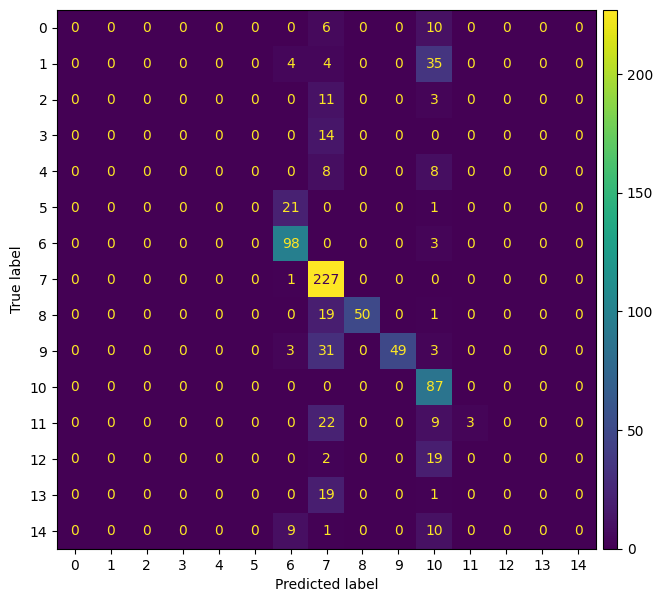

In [28]:
plt.style.use('default')
cm = metrics.confusion_matrix(y_test,y_pred)
disp1 = metrics.ConfusionMatrixDisplay(cm, display_labels=np.arange(len(le.classes_)))
fig, ax = plt.subplots(figsize=(7,7))

disp1.plot(ax=ax, colorbar=False)
# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(disp1.im_,  cax=cax);

In [29]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        43
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00        16
           5       0.00      0.00      0.00        22
           6       0.72      0.97      0.83       101
           7       0.62      1.00      0.77       228
           8       1.00      0.71      0.83        70
           9       1.00      0.57      0.73        86
          10       0.46      1.00      0.63        87
          11       1.00      0.09      0.16        34
          12       0.00      0.00      0.00        21
          13       0.00      0.00      0.00        20
          14       0.00      0.00      0.00        20

    accuracy                           0.65       792
   macro avg       0.32      0.29      0.26       792
weighted avg       0.56   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [30]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
ncomp=3
otus_pca=PCA(ncomp)
otus_pca.fit_transform(X_train_std)
X_train_pca = otus_pca.transform(X_train_std)
proj = pd.DataFrame(X_train_pca,columns = ['pc1','pc2','pc3'])
pca_proj = pd.DataFrame({'pc1': proj['pc1'], 'pc2': proj['pc2'], 'clima': y_train})

In [31]:
# Grafica interactiva
fig = px.scatter(pca_proj, x='pc1', y='pc2', hover_data=['clima'], color = 'clima')
fig.update_layout(autosize=False,width=800,height=800,)
fig.show()

In [32]:
X_test_std = scaler.fit_transform(X_test)
X_test_pca = otus_pca.transform(X_test_std)

In [33]:
logreg2 = LogisticRegression(solver='newton-cg')
logreg2.fit(X_train_pca, y_train)

y_pred2 = logreg2.predict(X_test_pca)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg2.score(X_test_pca, y_test)))

Accuracy of logistic regression classifier on test set: 0.77


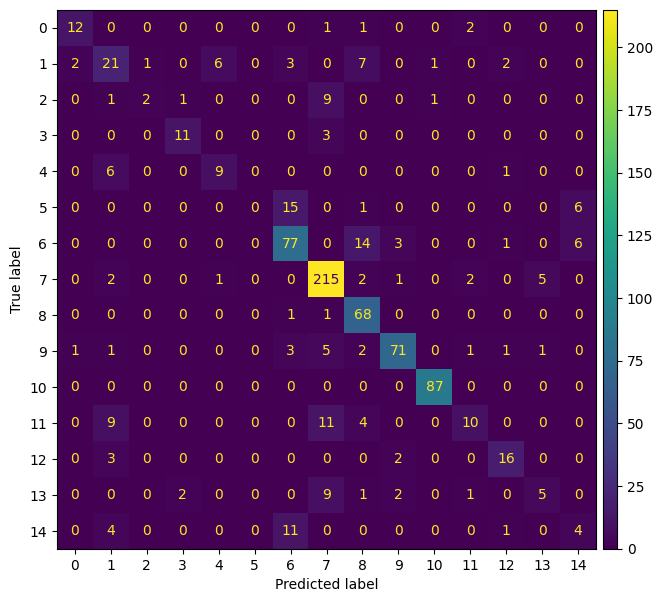

In [34]:
cm = metrics.confusion_matrix(y_test,y_pred2)
disp1 = metrics.ConfusionMatrixDisplay(cm, display_labels=np.arange(len(le.classes_)))
fig, ax = plt.subplots(figsize=(7,7))

disp1.plot(ax=ax, colorbar=False)
# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(disp1.im_,  cax=cax);

In [35]:
print(metrics.classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77        16
           1       0.45      0.49      0.47        43
           2       0.67      0.14      0.24        14
           3       0.79      0.79      0.79        14
           4       0.56      0.56      0.56        16
           5       0.00      0.00      0.00        22
           6       0.70      0.76      0.73       101
           7       0.85      0.94      0.89       228
           8       0.68      0.97      0.80        70
           9       0.90      0.83      0.86        86
          10       0.98      1.00      0.99        87
          11       0.62      0.29      0.40        34
          12       0.73      0.76      0.74        21
          13       0.45      0.25      0.32        20
          14       0.25      0.20      0.22        20

    accuracy                           0.77       792
   macro avg       0.63      0.58      0.59       792
weighted avg       0.74   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## Conclusiones

Scikit-learn es una herramienta muy completa para proyectos que involucran ciencia de datos a diferentes niveles.

La curva de aprendizaje es rápida, y siempre hay documentación disponible para las dudas que puedan surgir.

La mejor forma de aprenderla es programando...